In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv("train.csv")
data["lagged_forward_returns"] = data["forward_returns"].shift(1)
data["lagged_risk_free_rate"] = data["risk_free_rate"].shift(1)
data["lagged_market_forward_excess_returns"] = data["market_forward_excess_returns"].shift(1)
# train = train.dropna(inplace=True)
data

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns,lagged_forward_returns,lagged_risk_free_rate,lagged_market_forward_excess_returns
0,0,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,-0.002421,0.000301,-0.003038,NaN,NaN,NaN
1,1,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,-0.008495,0.000303,-0.009114,-0.002421,0.000301,-0.003038
2,2,0,0,0,1,0,0,0,0,1,...,NaN,NaN,NaN,NaN,-0.009624,0.000301,-0.010243,-0.008495,0.000303,-0.009114
3,3,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,0.004662,0.000299,0.004046,-0.009624,0.000301,-0.010243
4,4,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,-0.011686,0.000299,-0.012301,0.004662,0.000299,0.004046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9016,9016,0,0,0,1,0,0,0,0,0,...,0.677249,-0.327455,0.083995,-0.380452,-0.000015,0.000151,-0.000477,0.010401,0.000152,0.009936
9017,9017,0,0,0,1,0,0,0,0,0,...,0.596561,-0.372979,0.094246,-0.427355,-0.005199,0.000150,-0.005661,-0.000015,0.000151,-0.000477
9018,9018,0,0,0,1,0,-1,0,0,0,...,0.656746,-0.282024,0.090608,-0.381337,0.005930,0.000150,0.005467,-0.005199,0.000150,-0.005661
9019,9019,0,0,0,1,0,-1,0,0,0,...,0.674603,-0.445261,0.106481,-0.477635,0.008173,0.000150,0.007710,0.005930,0.000150,0.005467


In [10]:
split_idx = int(len(data) * 0.8)
train = data[:split_idx]
test = data[split_idx:]

In [11]:
from pykalman import KalmanFilter

In [25]:
data = train["market_forward_excess_returns"]
kf = KalmanFilter(initial_state_mean=0., n_dim_obs=1)
kf = kf.em(data, n_iter=5)
(filtered_state_means, filtered_state_covariances) = kf.filter(data)
train["target"] = filtered_state_means
train
test


/var/folders/8j/l332_mg90fgbltx_k4sj53tw0000gn/T/ipykernel_47887/3227292608.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["target"] = filtered_state_means


,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns,lagged_forward_returns,lagged_risk_free_rate,lagged_market_forward_excess_returns
7216,7216,0,0,0,0,0,0,0,0,0,...,0.304894,-0.486771,0.971230,-0.435854,-0.000594,0.000081,-0.000983,0.002345,0.000079,0.001957
7217,7217,0,0,0,0,0,-1,0,0,0,...,0.385582,-0.652994,0.980159,-0.472704,-0.001328,0.000081,-0.001718,-0.000594,0.000081,-0.000983
7218,7218,0,0,0,0,0,-1,0,0,0,...,0.465608,-0.608965,0.985450,-0.478784,0.006018,0.000081,0.005629,-0.001328,0.000081,-0.001718
7219,7219,0,0,0,0,0,-1,0,0,0,...,0.481481,-0.722916,0.990079,-0.559905,0.007895,0.000081,0.007505,0.006018,0.000081,0.005629
7220,7220,0,0,0,0,0,-1,0,0,0,...,0.475529,-0.675899,0.992725,-0.569237,0.000483,0.000082,0.000093,0.007895,0.000081,0.007505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9016,9016,0,0,0,1,0,0,0,0,0,...,0.677249,-0.327455,0.083995,-0.380452,-0.000015,0.000151,-0.000477,0.010401,0.000152,0.009936
9017,9017,0,0,0,1,0,0,0,0,0,...,0.596561,-0.372979,0.094246,-0.427355,-0.005199,0.000150,-0.005661,-0.000015,0.000151,-0.000477
9018,9018,0,0,0,1,0,-1,0,0,0,...,0.656746,-0.282024,0.090608,-0.381337,0.005930,0.000150,0.005467,-0.005199,0.000150,-0.005661
9019,9019,0,0,0,1,0,-1,0,0,0,...,0.674603,-0.445261,0.106481,-0.477635,0.008173,0.000150,0.007710,0.005930,0.000150,0.005467


In [32]:
cols = train.columns.to_list()
trash = ["date_id", "forward_returns", "risk_free_rate", "market_forward_excess_returns", "target"]
cols = [x for x in cols if x not in trash]
cols

['D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'E1',
 'E10',
 'E11',
 'E12',
 'E13',
 'E14',
 'E15',
 'E16',
 'E17',
 'E18',
 'E19',
 'E2',
 'E20',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'I1',
 'I2',
 'I3',
 'I4',
 'I5',
 'I6',
 'I7',
 'I8',
 'I9',
 'M1',
 'M10',
 'M11',
 'M12',
 'M13',
 'M14',
 'M15',
 'M16',
 'M17',
 'M18',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'P1',
 'P10',
 'P11',
 'P12',
 'P13',
 'P2',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'P8',
 'P9',
 'S1',
 'S10',
 'S11',
 'S12',
 'S2',
 'S3',
 'S4',
 'S5',
 'S6',
 'S7',
 'S8',
 'S9',
 'V1',
 'V10',
 'V11',
 'V12',
 'V13',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'lagged_forward_returns',
 'lagged_risk_free_rate',
 'lagged_market_forward_excess_returns',
 'KF_lagged_return']

In [39]:

(feat_filtered, _) = kf.filter(train["lagged_market_forward_excess_returns"])
train["KF_lagged_return"] = feat_filtered

# 对 Test set 做同样的操作 (用同一个 kf)
(test_feat_filtered, _) = kf.filter(test["lagged_market_forward_excess_returns"])
test["KF_lagged_return"] = test_feat_filtered

# 记得把新特征加入 cols
cols.append("KF_lagged_return")
cols = list(set(cols))
cols

/var/folders/8j/l332_mg90fgbltx_k4sj53tw0000gn/T/ipykernel_47887/99031113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["KF_lagged_return"] = feat_filtered
/var/folders/8j/l332_mg90fgbltx_k4sj53tw0000gn/T/ipykernel_47887/99031113.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["KF_lagged_return"] = test_feat_filtered


['V4',
 'E18',
 'M9',
 'E6',
 'M4',
 'S2',
 'V6',
 'I2',
 'I8',
 'P8',
 'M11',
 'E14',
 'D2',
 'E13',
 'E8',
 'E7',
 'E4',
 'V9',
 'V5',
 'M13',
 'E19',
 'P1',
 'V2',
 'E11',
 'V3',
 'S7',
 'V8',
 'M3',
 'lagged_market_forward_excess_returns',
 'D8',
 'M18',
 'S10',
 'S1',
 'I5',
 'M7',
 'E12',
 'S12',
 'D6',
 'E3',
 'D9',
 'I9',
 'P12',
 'P5',
 'lagged_risk_free_rate',
 'I3',
 'P9',
 'P6',
 'V10',
 'M6',
 'P11',
 'I7',
 'V1',
 'S6',
 'V7',
 'KF_lagged_return',
 'P2',
 'P4',
 'I4',
 'lagged_forward_returns',
 'V13',
 'M15',
 'E5',
 'E10',
 'D3',
 'S11',
 'M8',
 'V11',
 'M16',
 'M2',
 'P13',
 'D1',
 'S9',
 'M12',
 'M5',
 'S8',
 'E2',
 'E1',
 'P3',
 'E16',
 'E20',
 'M17',
 'M1',
 'D5',
 'E17',
 'D4',
 'I1',
 'D7',
 'S4',
 'S5',
 'M14',
 'I6',
 'E9',
 'E15',
 'P10',
 'V12',
 'S3',
 'M10',
 'P7']

In [40]:
import lightgbm as lgb
lgb_train = lgb.Dataset(train[cols], label=train["target"])
lgb_test = lgb.Dataset(test[cols], label=test["market_forward_excess_returns"])

params = {
    'objective': 'regression',  # 回归任务
    'metric': 'rmse',           # 评估指标
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,      # 学习率
    'num_leaves': 31,           # 叶子节点数 (控制复杂度)
    'feature_fraction': 0.8,    # 每次随机选 80% 特征 (防止过拟合)
    'bagging_fraction': 0.8,    # 每次随机选 80% 数据
    'bagging_freq': 5,
    'seed': 42,
    'verbosity': -1
}

callbacks = [
    lgb.early_stopping(stopping_rounds=50),
    lgb.log_evaluation(period=50)
]

model = lgb.train(
    params,
    lgb_train,
    num_boost_round=1000, # 最大轮数
    valid_sets=[lgb_train, lgb_test],
    valid_names=['train', 'valid'],
    callbacks=callbacks
)

Training until validation scores don't improve for 50 rounds
[50]	train's rmse: 0.00605716	valid's rmse: 0.0113792
Early stopping, best iteration is:
[1]	train's rmse: 0.00718905	valid's rmse: 0.0111223


Validation RMSE: 0.01112
真实值标准差: 0.01111
预测值标准差: 0.00014
建议放大倍数: 79.17
修正后的 RMSE: 0.01607


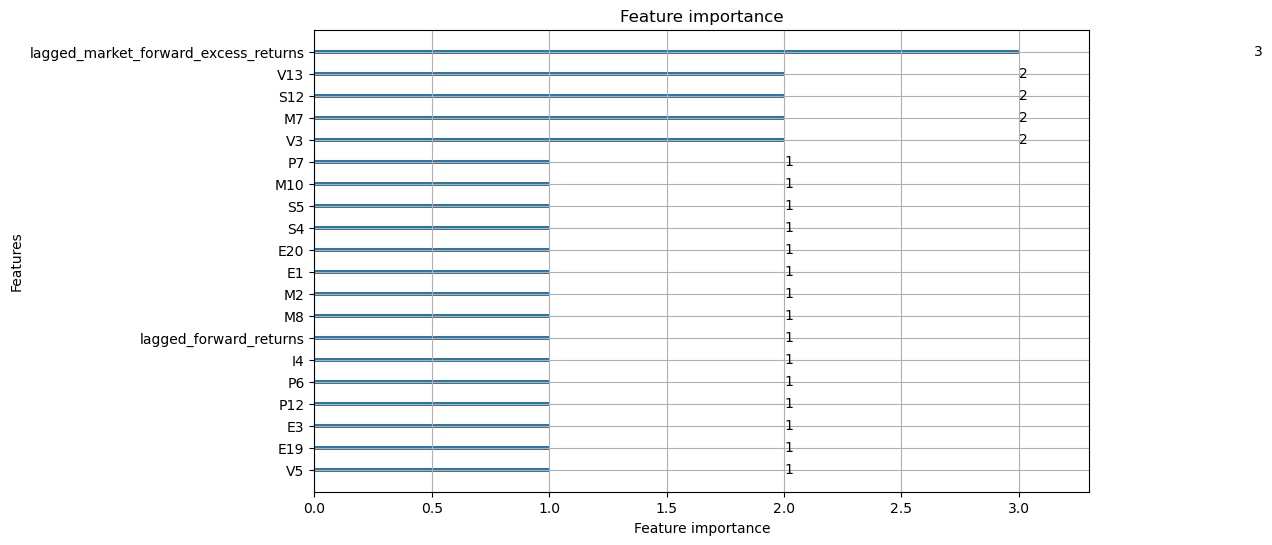

In [41]:
# 1. 预测
val_pred = model.predict(test[cols])

# 2. 评估 (计算 RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test["market_forward_excess_returns"], val_pred))
print(f"Validation RMSE: {rmse:.5f}")

# 3. 检查波动率 (Std)
std_raw = np.std(test["market_forward_excess_returns"])
std_pred = np.std(val_pred)
print(f"真实值标准差: {std_raw:.5f}")
print(f"预测值标准差: {std_pred:.5f}")

# 4. 幅度修正 (Rescaling)
# 如果预测值波动太小，按比例放大
scaling_factor = std_raw / std_pred
print(f"建议放大倍数: {scaling_factor:.2f}")

# 修正后的预测
val_pred_scaled = val_pred * scaling_factor
rmse_scaled = np.sqrt(mean_squared_error(test["market_forward_excess_returns"], val_pred_scaled))
print(f"修正后的 RMSE: {rmse_scaled:.5f}")

# 5. 特征重要性
lgb.plot_importance(model, max_num_features=20, figsize=(10, 6))
plt.show()